In [3]:
pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.3 MB 6.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.3 MB 12.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 12.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 12.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 12.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 12.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 3.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.2/1.3 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install eli5

     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     ----------- --------------------------- 61.4/216.2 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 216.2/216.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107761 sha256=b989ebbcb0b9227f8599b4fe9e8683b68c7c60776285be8ba6e1c22d92a65047
  Stored in directory: c:\users\vijay\appdata\local\pip\cache\wheels\ec\68\a9\de7d374ecb6f53462ce0eec8326fbab91b6228c82e67428d0d
Successfully built eli5
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pdpbox

   ---------------------------------------- 0.0/35.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/35.8 MB 5.8 MB/s eta 0:00:07
    --------------------------------------- 0.5/35.8 MB 8.3 MB/s eta 0:00:05
   - -------------------------------------- 1.1/35.8 MB 9.6 MB/s eta 0:00:04
   - -------------------------------------- 1.1/35.8 MB 7.7 MB/s eta 0:00:05
   - -------------------------------------- 1.1/35.8 MB 7.7 MB/s eta 0:00:05
   - -------------------------------------- 1.1/35.8 MB 7.7 MB/s eta 0:00:05
   - -------------------------------------- 1.1/35.8 MB 7.7 MB/s eta 0:00:05
   - -------------------------------------- 1.1/35.8 MB 7.7 MB/s eta 0:00:05
   - -------------------------------------- 1.2/35.8 MB 3.0 MB/s eta 0:00:12
   - -------------------------------------- 1.5/35.8 MB 3.5 MB/s eta 0:00:10
   - -------------------------------------- 1.6/35.8 MB 3.3 MB/s eta 0:00:11
   - -------------------------------------- 1.7/35.8 MB 3.3 MB/s eta 0:00:11
   - -

In [2]:
pip install --upgrade pdpbox

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import eli5

from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp,info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, auc

random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv("train.csv")
pd.options.display.max_columns=None

In [4]:
df_train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

In [5]:
df_train.shape

(200000, 202)

In [6]:
df_train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

In [7]:
target_class=df_train['target'].value_counts()
print('Count of Target class:\n',target_class)

per_target_class=df_train['target'].value_counts()/len(df_train)*100
print('Percentage of target class count:\n',per_target_class)

Count of Target class:
 target
0    179902
1     20098
Name: count, dtype: int64
Percentage of target class count:
 target
0    89.951
1    10.049
Name: count, dtype: float64


Text(0, 0.5, 'Index')

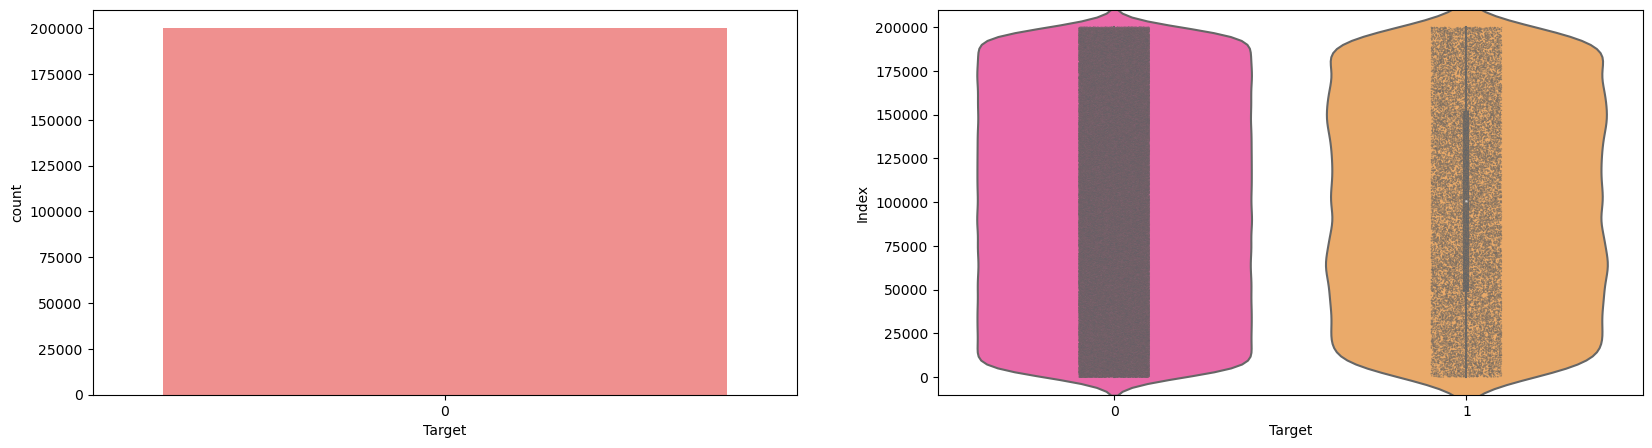

In [8]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(df_train.target.values,ax=ax[0],palette='spring')
sns.violinplot(x=df_train.target.values,y=df_train.index.values,ax=ax[1],palette='spring')
sns.stripplot(x=df_train.target.values,y=df_train.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='spring')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')

In [9]:
%%time

def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style("darkgrid")
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute')
        sns.set_style('ticks',{'xtick.major.size':8,'ytick.major.size':8})
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


<Figure size 640x480 with 0 Axes>

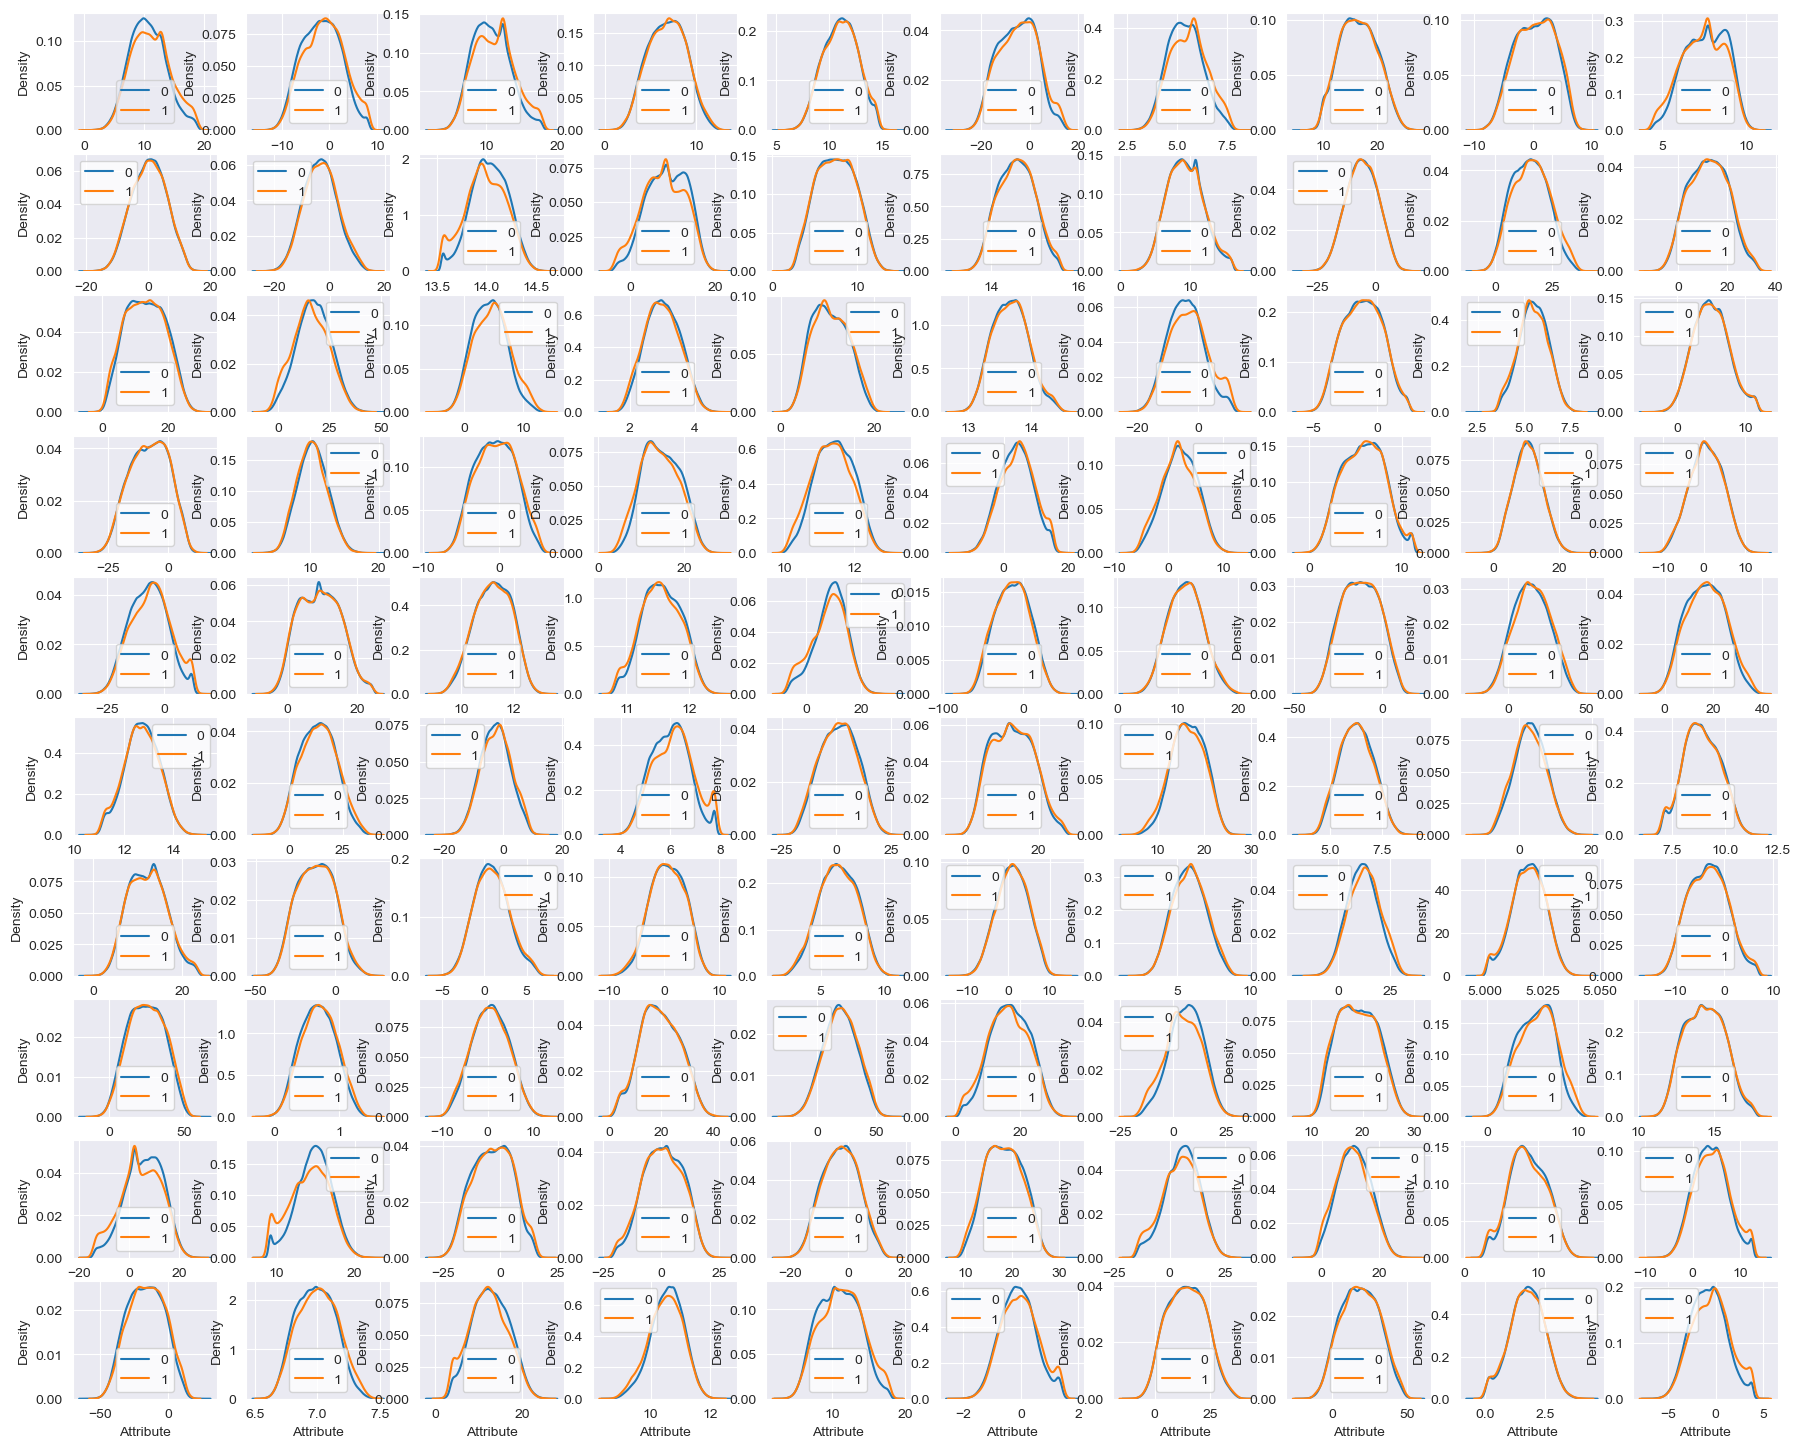

CPU times: total: 1min 23s
Wall time: 1min 15s


In [10]:
%%time

t0=df_train[df_train.target.values==0]
t1=df_train[df_train.target.values==1]
train_attributes=df_train.columns.values[2:102]
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

<Figure size 640x480 with 0 Axes>

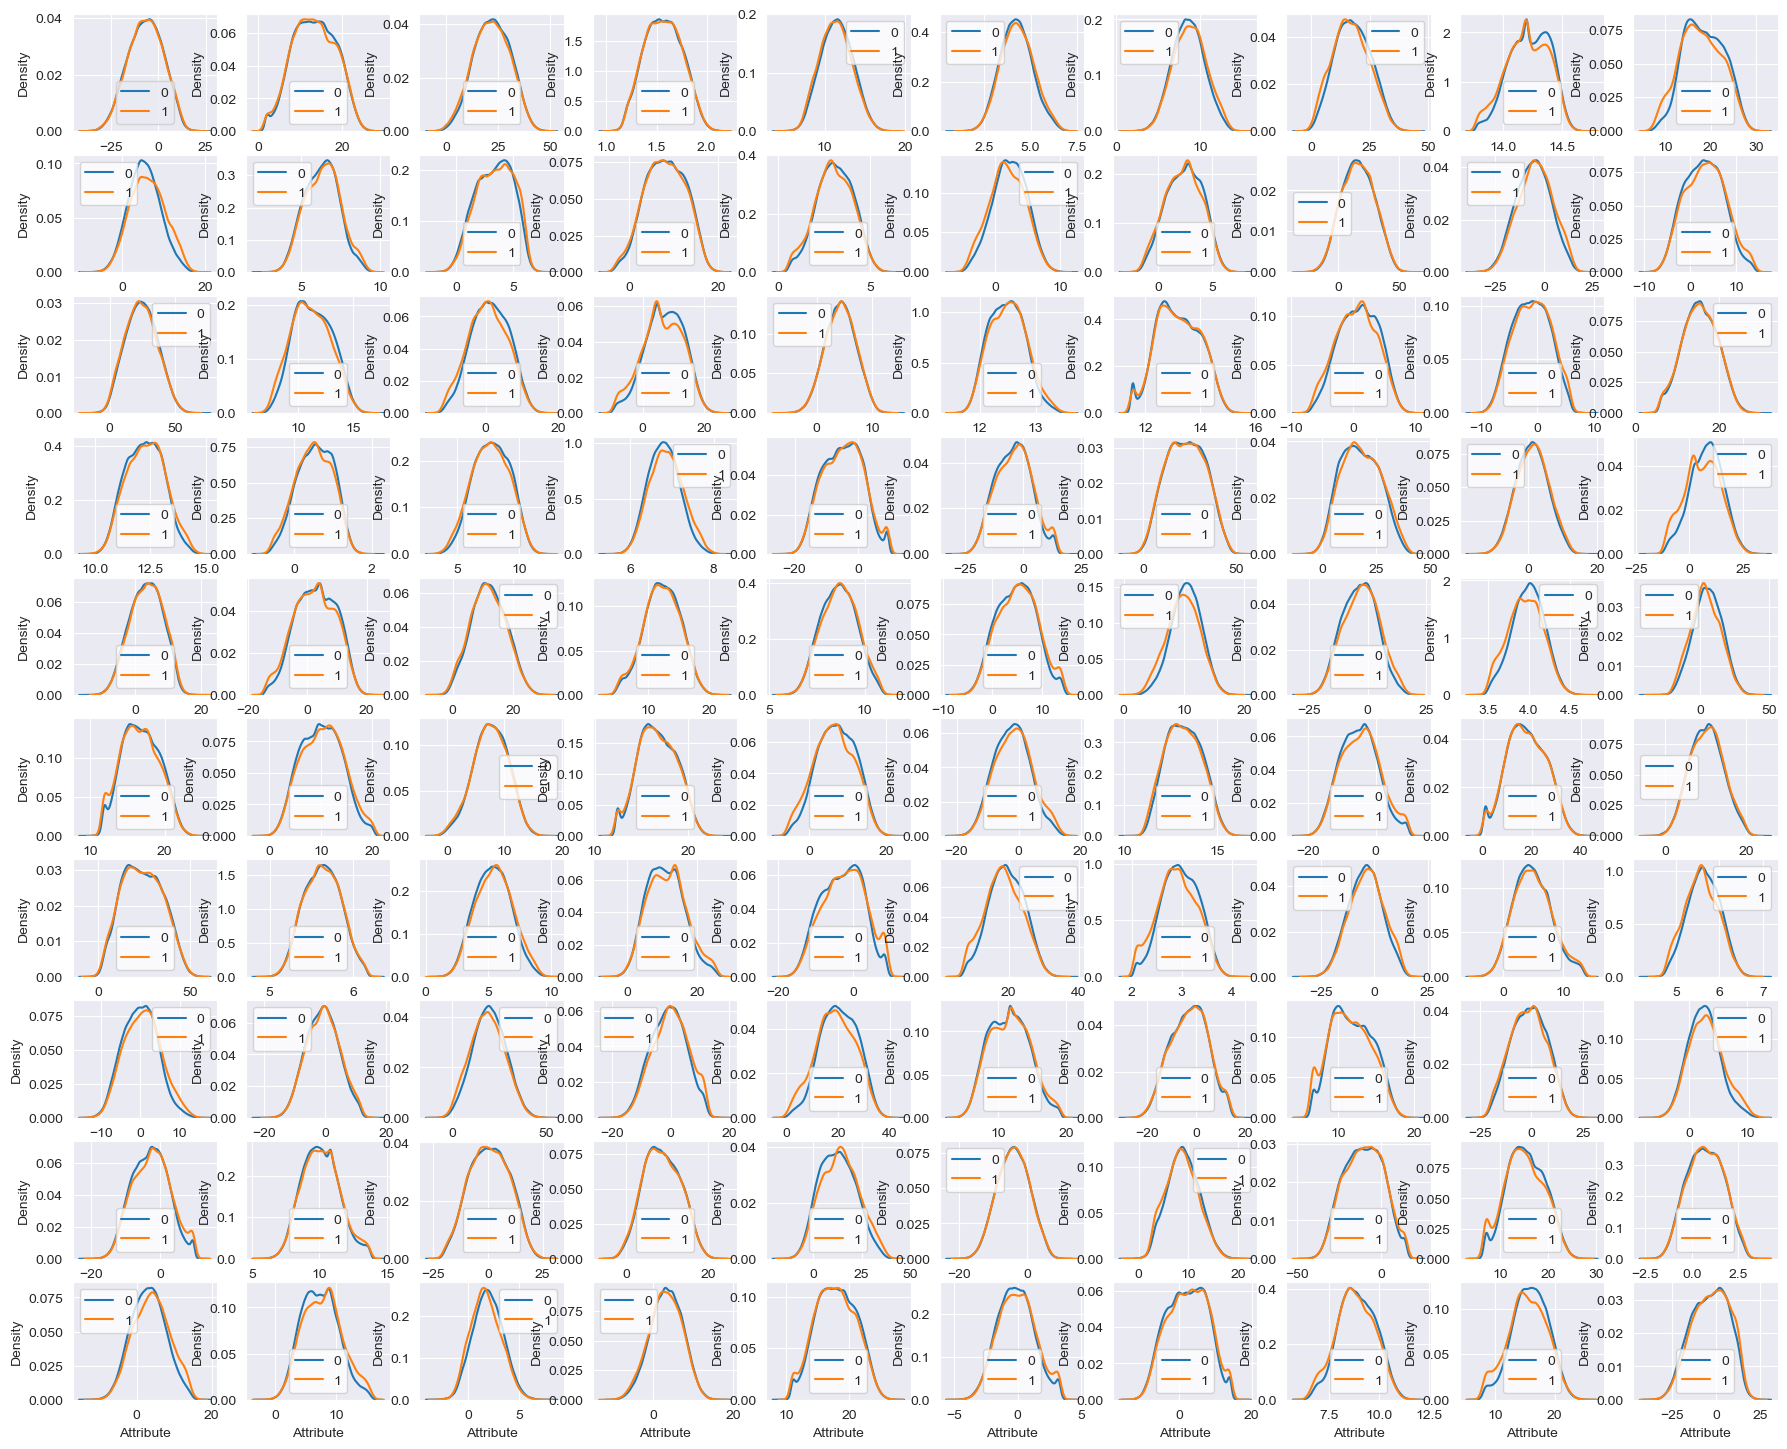

In [11]:
train_attributes=df_train.columns.values[102:202]
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

In [12]:
df_test=pd.read_csv('test.csv')

In [13]:
df_test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8   var_9  var_10  var_11   var_12   var_13   var_14  \
0  18.2675  2.1337  8.8100 -2.0248 -4.3554  13.9696   0.3458   7.5408   
1  18.6316 -4.4131  5.9739 -1.3809 -0.3310  14.1129   2.5667   5.4988   
2  20.2537  1.5233  8.3442 -4.7057 -3.0422  13.6751   3.8183  10.8535   
3  20.5660  3.3755  7.4578  0.0095 -5.0659  14.0526  13.5010   8.7660   
4  10.6048  2.9890  7.1437  5.1025 -3.2827  14.1013   8.9672   4.7276   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21  var_22  \
0  14.5001   7.7028 -19.0919  15.5806  16.1763   3.7088  18.8064  1.5899   
1  14.1853   7.0196   4.6564  29.1609   0.0910  12.1469   3.1389  5.2578   
2  14.2126   9.8837   2.6541  21.2181  20.8163  12.4666  12.3696  4.7473   
3  14.7352  10.0383 -15.3508   2.1273  21.4797  14.5372  12.5527  2.9707   
4  14.5811  11.8615   3.1480  18.0126  13.8006   1.6026  16.3059  6.7954   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  3.0654   6.4509  14.1192  -9.4902 -2.1917  5.7107  3.7864  -1.7981   
1  2.4228  16.2064  13.5023  -5.2341 -3.6648  5.7080  2.9965 -10.4720   
2  2.7936   5.2189  13.5670 -15.4246 -0.1655  7.2633  3.4310  -9.1508   
3  4.2398  13.7796  14.1408   1.0061 -1.3479  5.2570  6.5911   6.2161   
4  3.6015  13.6569  13.8807   8.6228 -2.2654  5.2255  7.0165 -15.6961   

    var_31  var_32   var_33   var_34  var_35  var_36  var_37   var_38  var_39  \
0   9.2645  2.0657  12.7753  11.3334  8.1462 -0.0610  3.5331   9.7804  8.7625   
1  11.4938 -0.9660  15.3445  10.6361  0.8966  6.7428  2.3421  12.8678 -1.5536   
2   9.7320  3.1062  22.3076  11.9593  9.9255  4.0702  4.9934   8.0667  0.8804   
3   9.5540  2.3628  10.2124  10.8047 -2.5588  6.0720  3.2613  16.5632  8.8336   
4  10.6239 -4.7674  17.5447  11.8668  3.0154  4.2546  6.7601   5.9613  0.3695   

    var_40   var_41   var_42   var_43   var_44   var_45   var_46   var_47  \
0 -15.6305  18.8766  11.2864  11.8362  13.3680 -31.9891  12.1776   8.7714   
1  10.0309   3.1337  10.5742  11.7664   2.1782 -41.1924  13.5322 -17.3834   
2 -19.0841   5.2272   9.5977  12.1801   8.3565  15.1170  10.0921 -20.8504   
3  -4.8327   0.9554  12.3754  11.4241   6.6917 -12.9761  13.7343   5.0150   
4 -14.4364   5.1392  11.6336  12.0338  18.9670  12.0144  16.2096  -2.1966   

    var_48   var_49   var_50   var_51  var_52  var_53  var_54   var_55  \
0  17.2011  16.8508  13.0534  14.4069 -4.8525  7.3213 -0.5259  16.6365   
1   6.3806  12.5589  11.6887  25.3930  1.5776  6.8481  8.7348  16.4239   
2   8.6758   8.1292  11.8932  10.6869 -0.6434  5.6510  9.3742  25.8831   
3  31.3923   5.8555  12.6082   1.4182 -4.1185  6.2536  1.4257  13.5426   
4   1.1174  13.4532  12.7925   4.3775 -0.1543  5.6794  0.8210  19.1358   

    var_56  var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  \
0  19.3036  6.4129 -5.3948   9.3269  11.9314  -3.5750 -0.7706  0.8705  6.9282   
1  21.7056  6.9345  1.6678   9.5249   5.3383 -18.7083  1.3382 -1.7401  5.8398   
2  19.8701  5.4834 -4.0304   8.5160   8.9776  -5.6619  2.8117  2.5996  9.0986   
3  15.4090  6.8761  1.7476  10.0413  15.2857  -4.1378  0.7928  2.5301  8.1458   
4  12.6589  6.4394  4.3425   8.7003  12.0586 -10.4753 -0.0337  5.6603  6.2529   

   var_65  var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73  \
0  2.8914  5.9744  17.4851  5.0125 -1.4230  33.3401  0.8018 -4.7906  30.2708   
1  3.1051  4.4307  16.0005  5.0306 -7.3365  12.2806  0.6992 -0.7772  21.5123   
2  7.1167  4.9466  13.8268  5.0093  4.7782  19.2081  0.4340  0.8459  34.8598   
3  2.5738  5.9876  13.0758

In [14]:
df_test.shape

(200000, 201)

In [15]:
%%time

def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style("darkgrid")
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(df_test[attribute],hist=False)
        plt.xlabel('Attribute')
        sns.set_style('ticks',{'xtick.major.size':8,'ytick.major.size':8})
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


<Figure size 640x480 with 0 Axes>

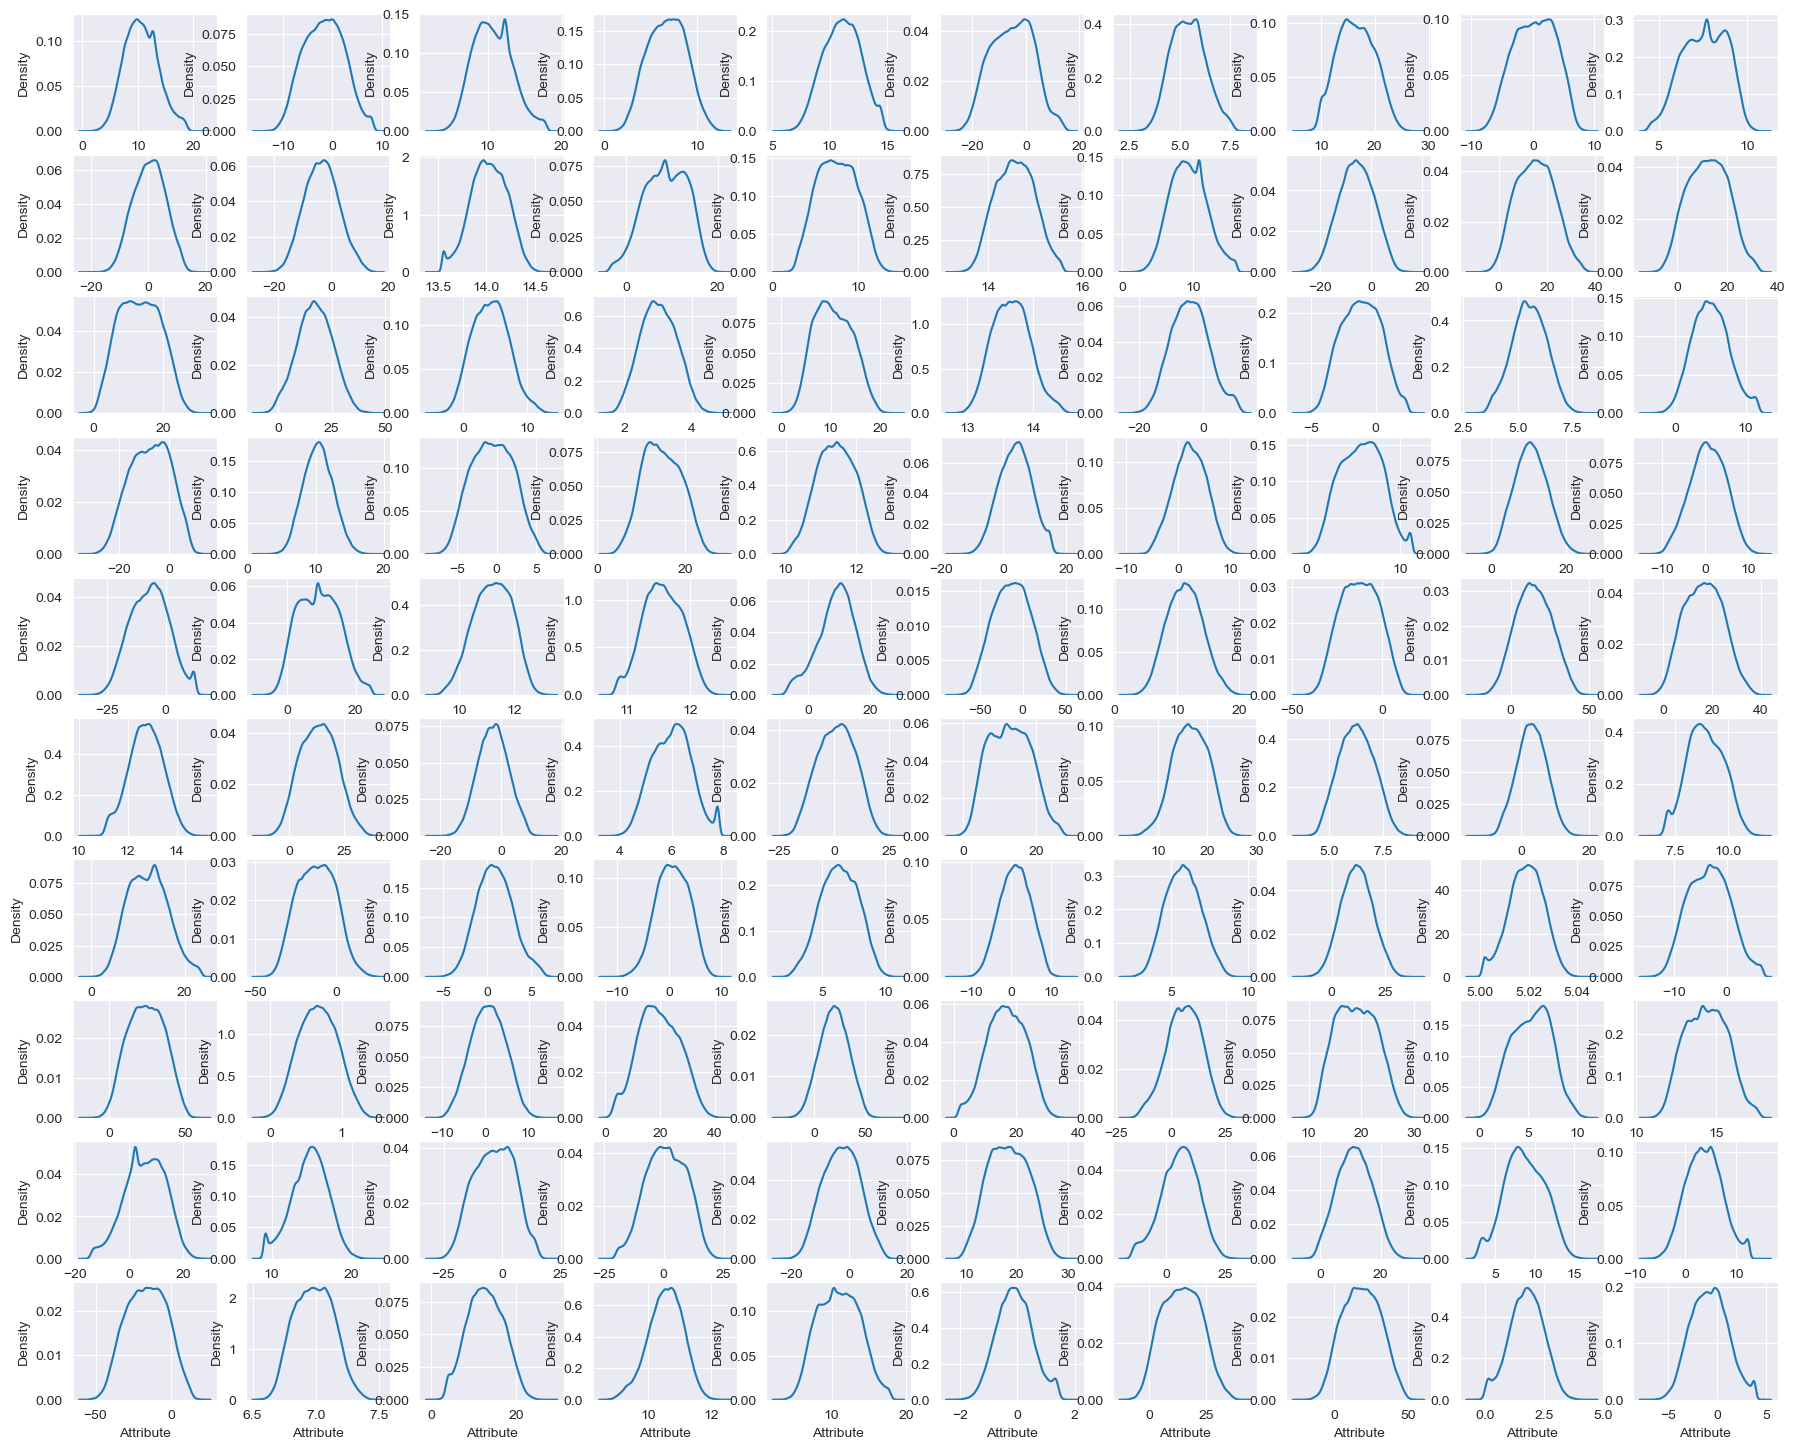

CPU times: total: 43.8 s
Wall time: 1min 17s


In [16]:
%%time

test_attributes=df_test.columns.values[1:101]
plot_test_attribute_distribution(test_attributes)

<Figure size 640x480 with 0 Axes>

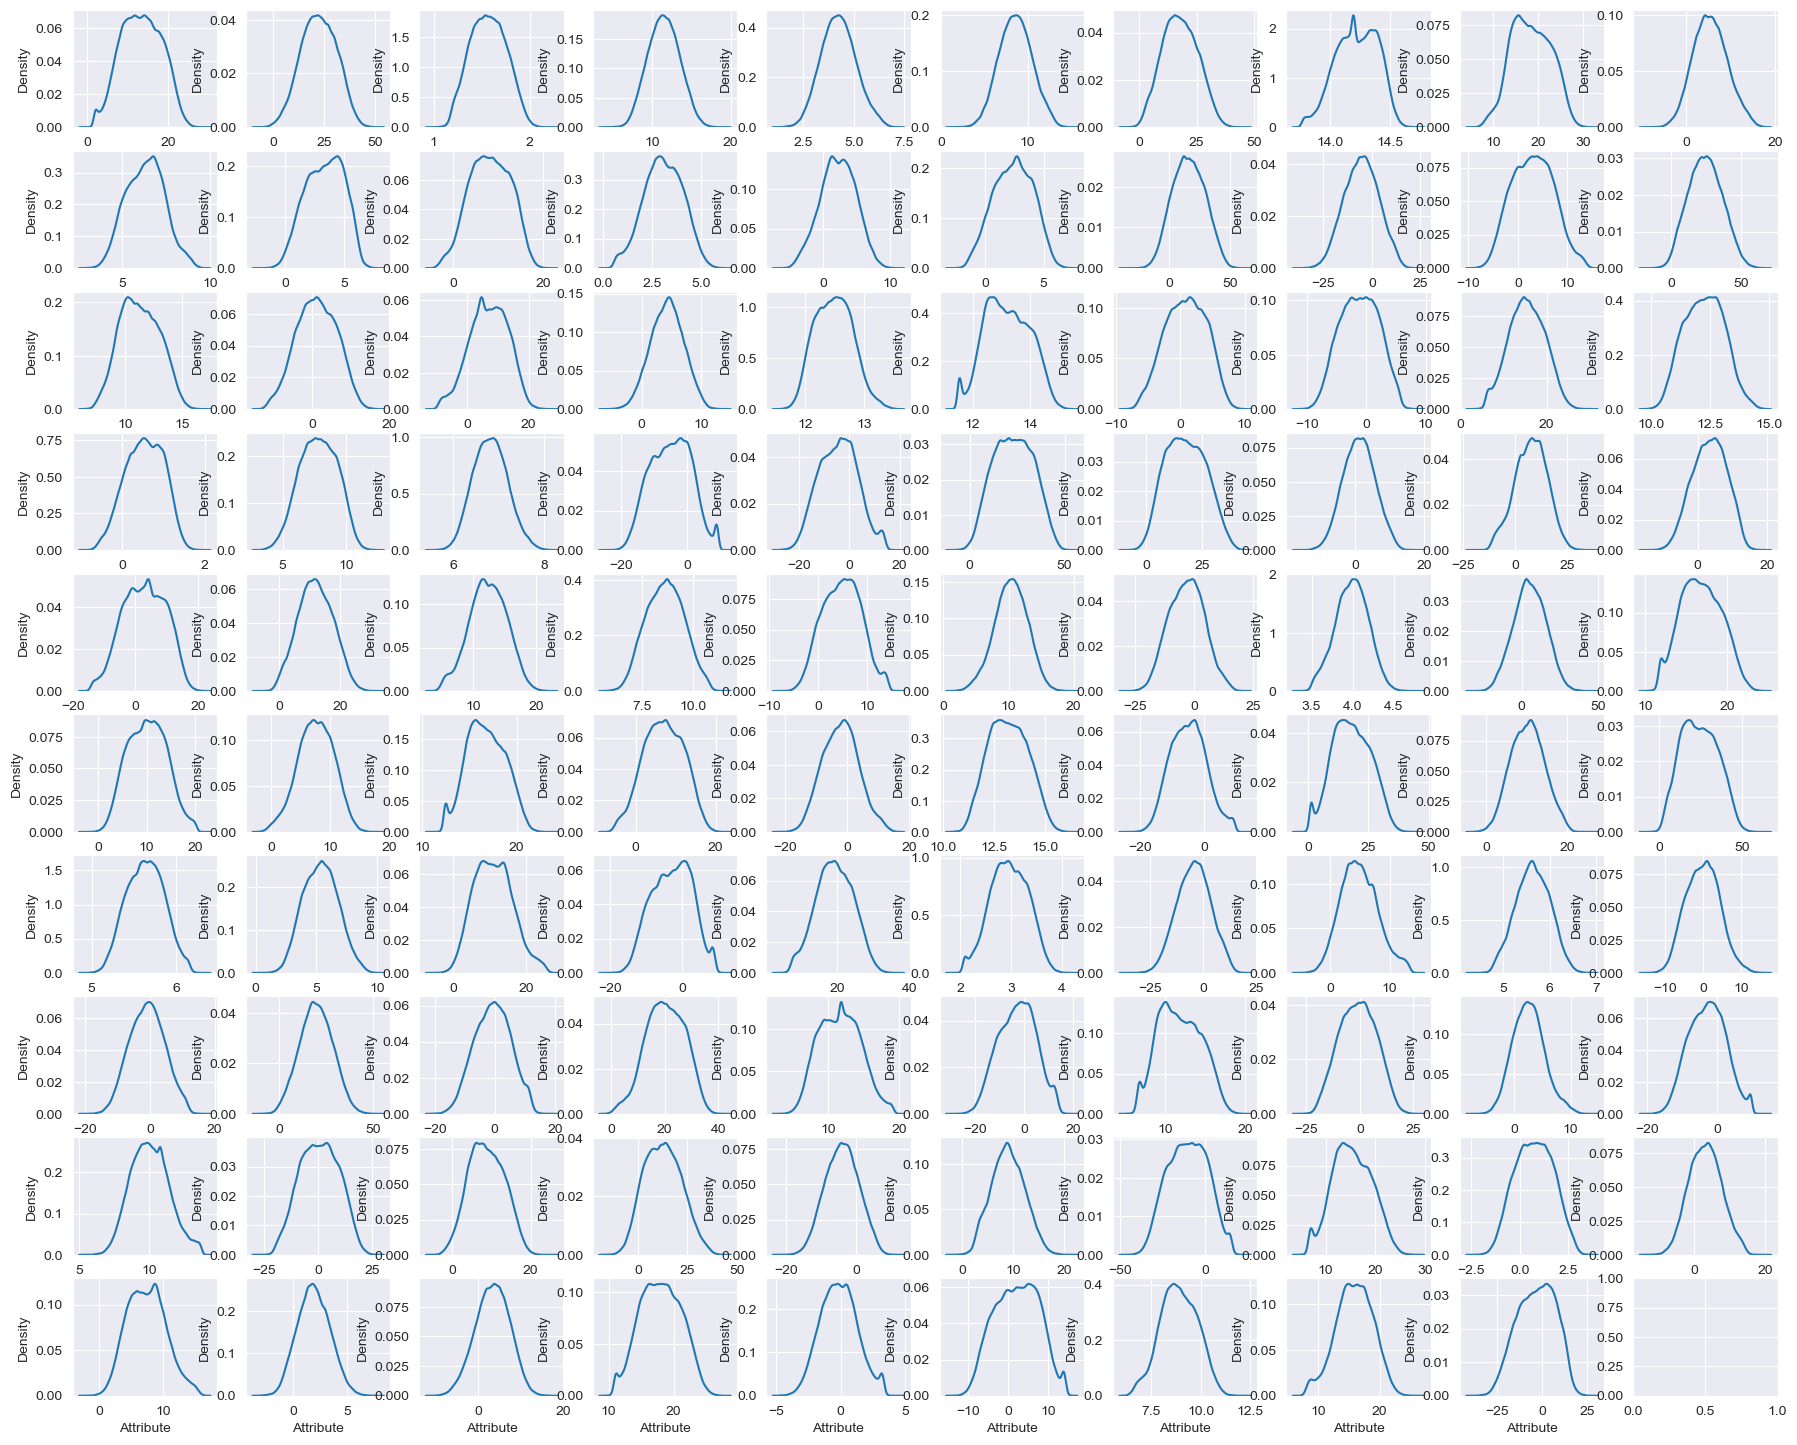

CPU times: total: 45.3 s
Wall time: 1min 16s


In [17]:
%%time

test_attributes=df_test.columns.values[102:202]
plot_test_attribute_distribution(test_attributes)

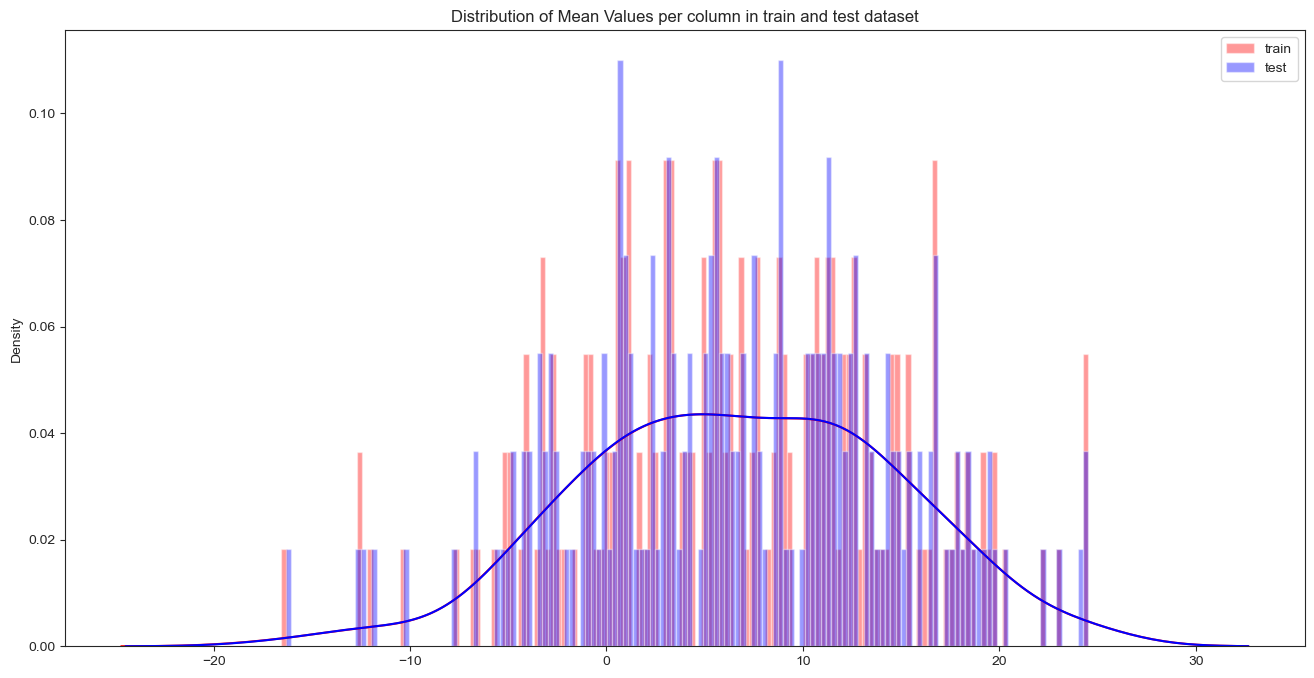

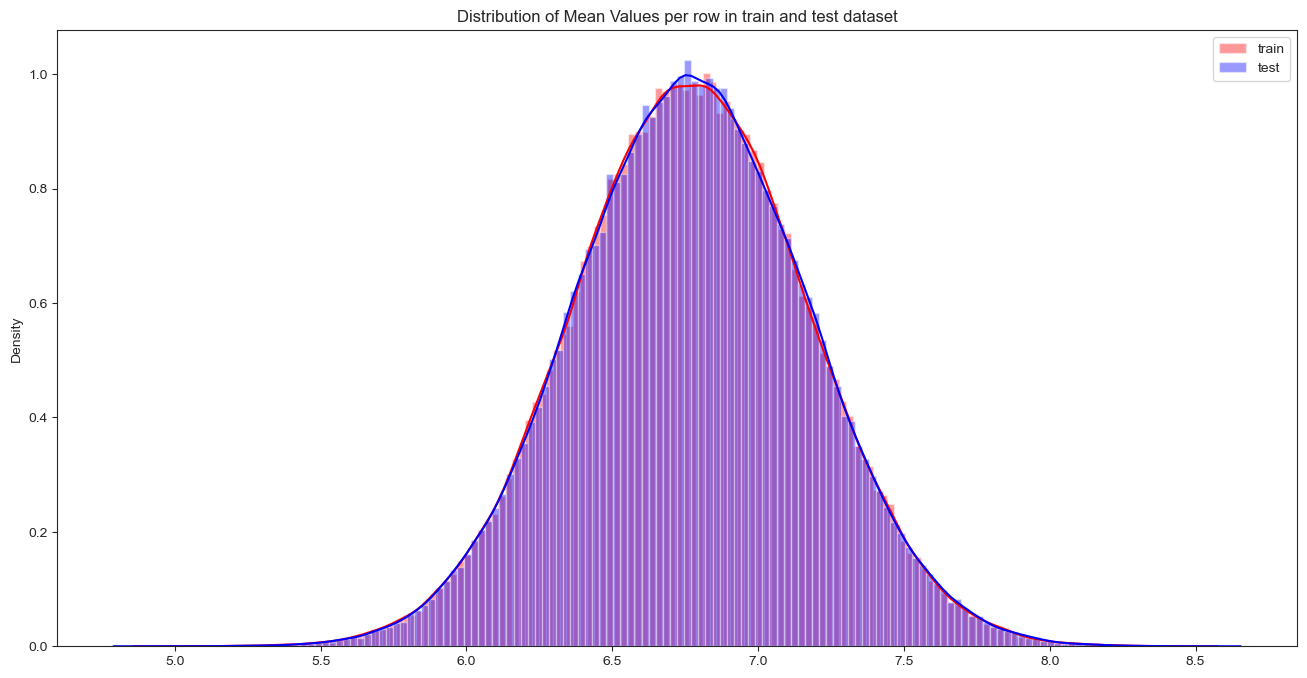

CPU times: total: 1.52 s
Wall time: 3.39 s


In [18]:
%%time

plt.figure(figsize=(16,8))
train_attributes=df_train.columns.values[2:202]
test_attributes=df_test.columns.values[1:201]
sns.distplot(df_train[train_attributes].mean(axis=0),color='red',kde=True,bins=150,label='train')
sns.distplot(df_test[test_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of Mean Values per column in train and test dataset')
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
sns.distplot(df_train[train_attributes].mean(axis=1),color='red',kde=True,bins=150,label='train')
sns.distplot(df_test[test_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of Mean Values per row in train and test dataset')
plt.legend()
plt.show()

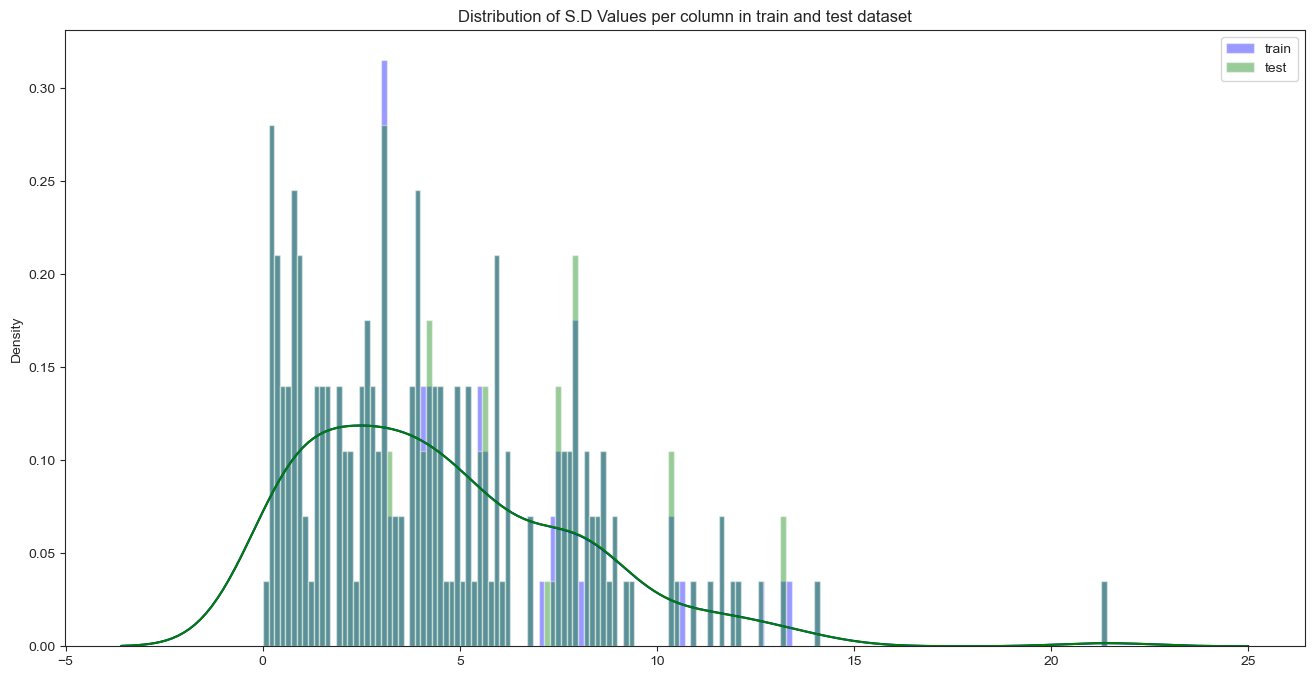

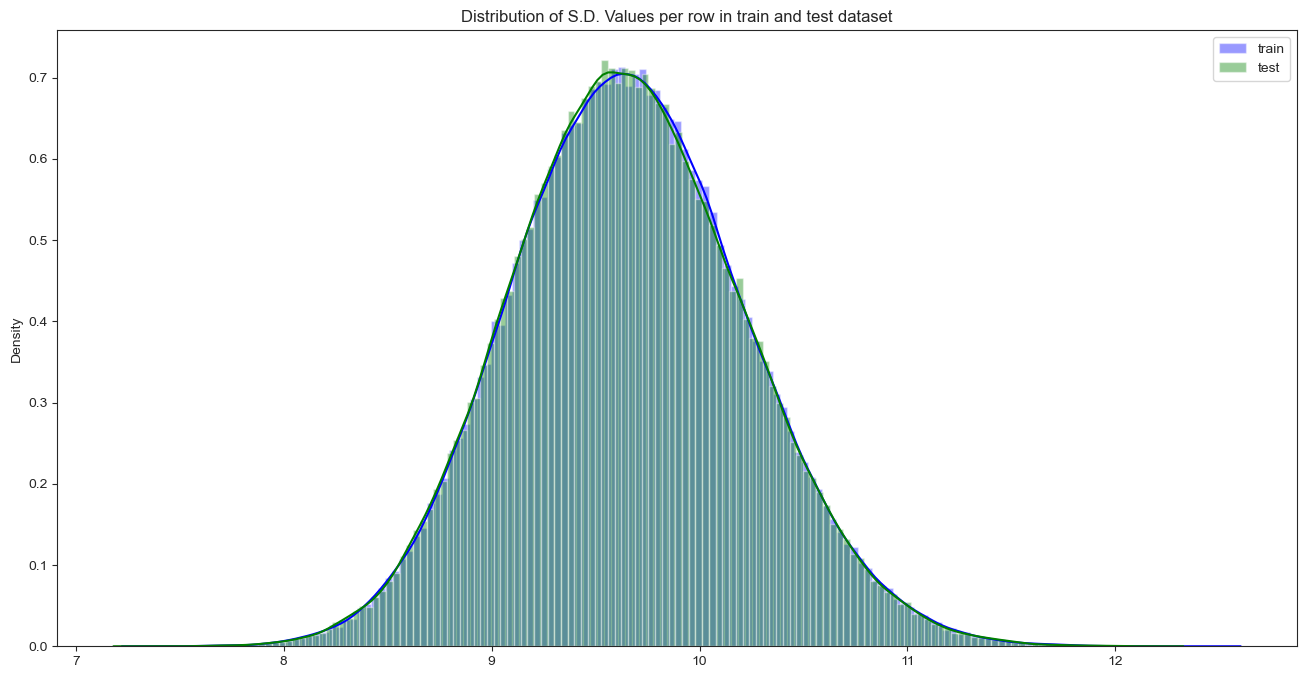

CPU times: total: 1.58 s
Wall time: 3.53 s


In [19]:
%%time

plt.figure(figsize=(16,8))
train_attributes=df_train.columns.values[2:202]
test_attributes=df_test.columns.values[1:201]
sns.distplot(df_train[train_attributes].std(axis=0),color='blue',kde=True,bins=150,label='train')
sns.distplot(df_test[test_attributes].std(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of S.D Values per column in train and test dataset')
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
sns.distplot(df_train[train_attributes].std(axis=1),color='blue',kde=True,bins=150,label='train')
sns.distplot(df_test[test_attributes].std(axis=1),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of S.D. Values per row in train and test dataset')
plt.legend()
plt.show()

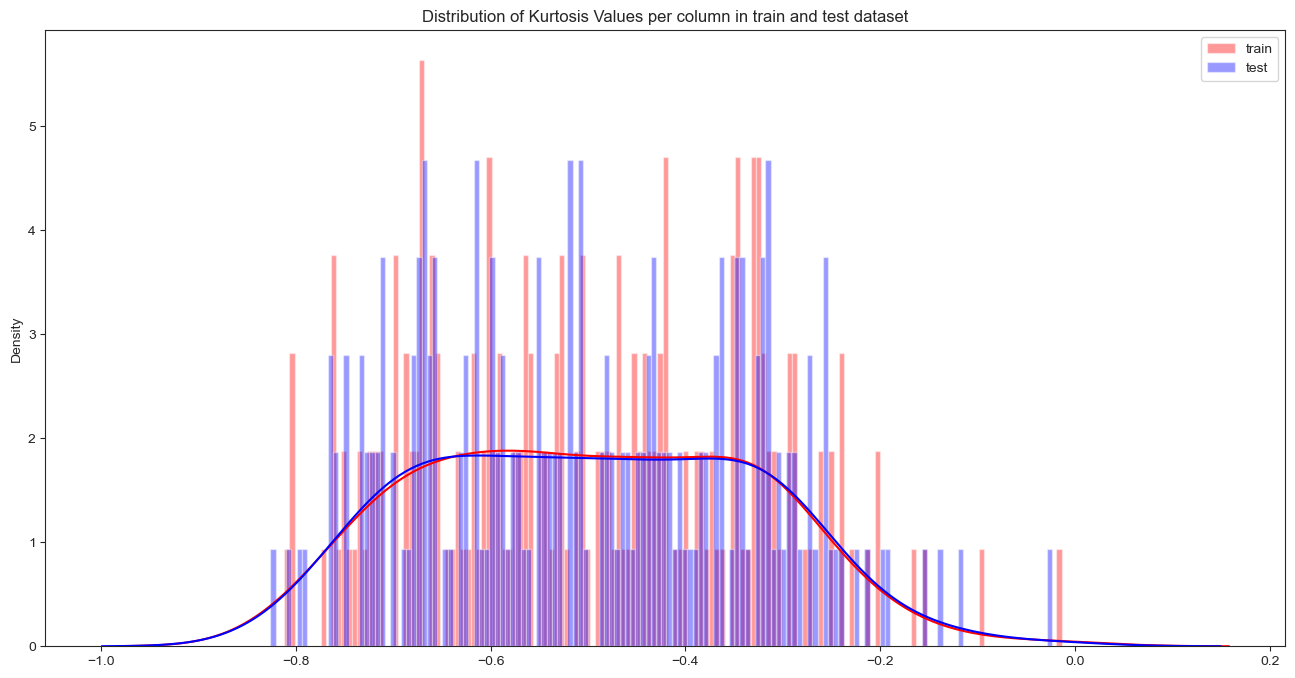

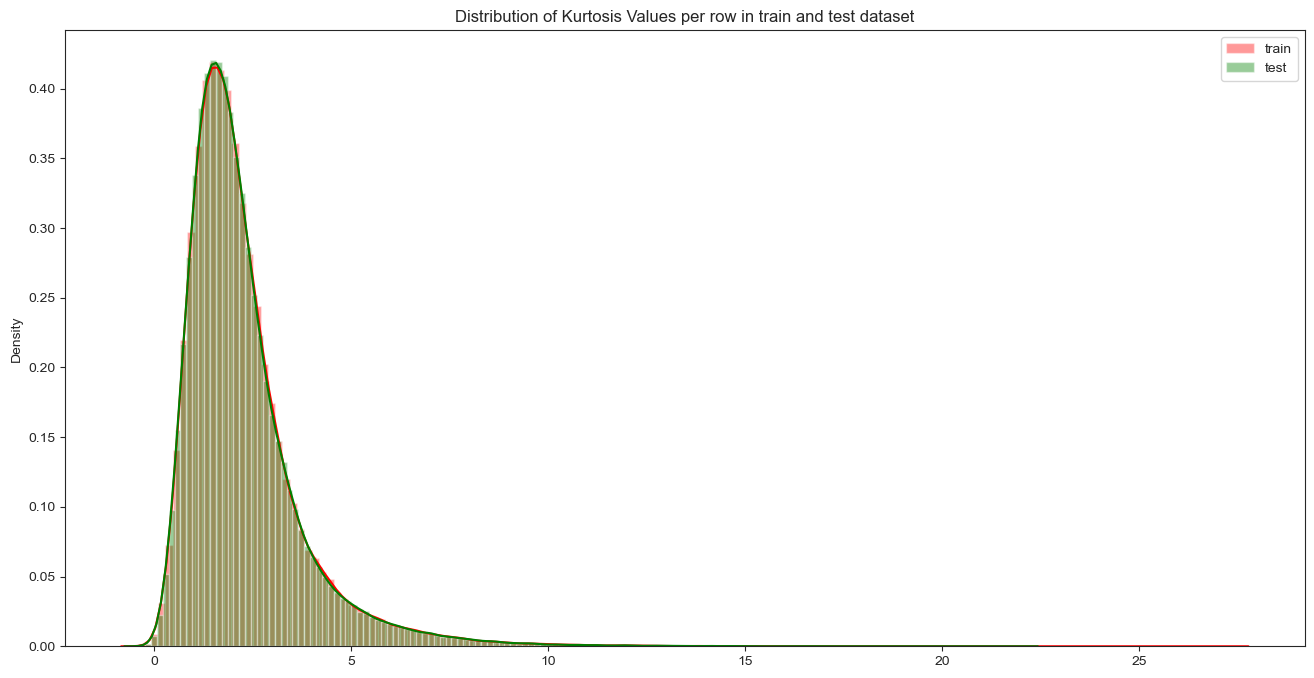

CPU times: total: 2.34 s
Wall time: 6.22 s


In [20]:
%%time

plt.figure(figsize=(16,8))
train_attributes=df_train.columns.values[2:202]
test_attributes=df_test.columns.values[1:201]
sns.distplot(df_train[train_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='train')
sns.distplot(df_test[test_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of Kurtosis Values per column in train and test dataset')
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
sns.distplot(df_train[train_attributes].kurtosis(axis=1),color='red',kde=True,bins=150,label='train')
sns.distplot(df_test[test_attributes].kurtosis(axis=1),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of Kurtosis Values per row in train and test dataset')
plt.legend()
plt.show()

In [21]:
%%time
train_missing=df_train.isnull().sum().sum()
test_missing=df_test.isnull().sum().sum()
print("Missing values in train data:",train_missing)
print("Missing values in test data:",test_missing)

Missing values in train data: 0
Missing values in test data: 0
CPU times: total: 0 ns
Wall time: 123 ms


In [22]:
%%time

train_attributes=df_train.columns.values[2:202]
train_correlation=df_train[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlation=train_correlation[train_correlation['level_0']!=train_correlation['level_1']]
print(train_correlation.head(10))
print(train_correlation.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
CPU times: total: 3.33 s
Wall time: 14.7 s


In [23]:
%%time

test_attributes=df_test.columns.values[1:201]
test_correlation=df_test[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlation=test_correlation[test_correlation['level_0']!=test_correlation['level_1']]
print(test_correlation.head(10))
print(test_correlation.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868
CPU times: total: 2.19 s
Wall time: 14.7 s


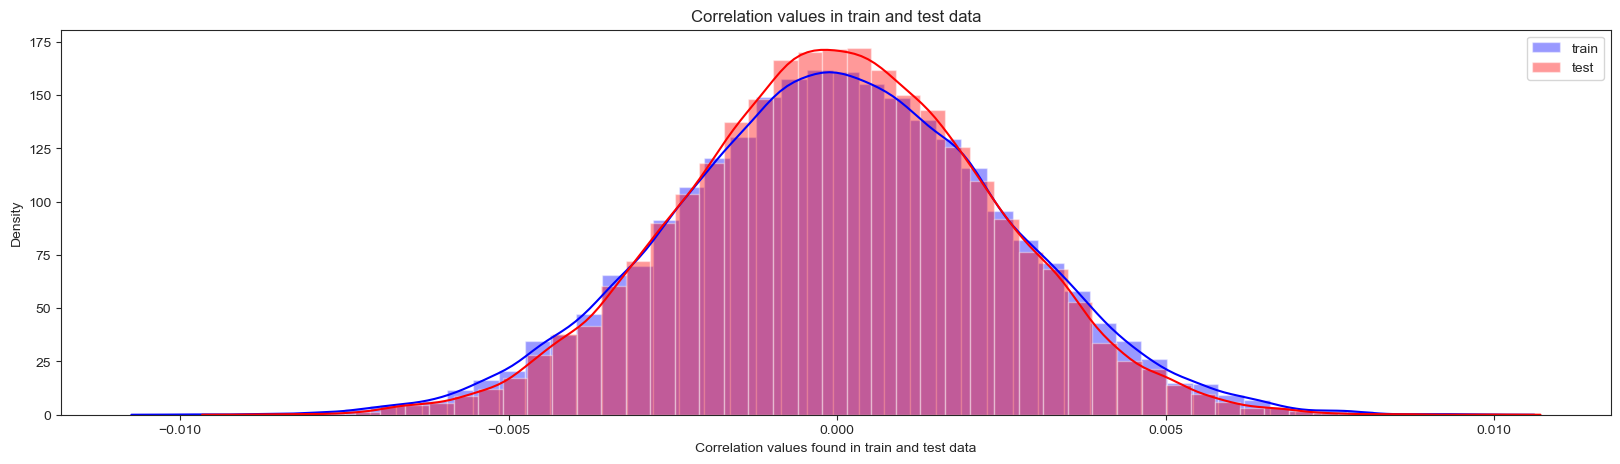

In [24]:
train_correlation=df_train[train_attributes].corr()
train_correlation=train_correlation.values.flatten()
train_correlation=train_correlation[train_correlation!=1]

test_correlation=df_test[test_attributes].corr()
test_correlation=test_correlation.values.flatten()
test_correlation=test_correlation[test_correlation!=1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlation,color='blue',label='train')
sns.distplot(test_correlation,color='red',label='test')
plt.xlabel("Correlation values found in train and test data")
plt.ylabel("Density")
plt.title("Correlation values in train and test data")
plt.legend()
plt.show()

In [25]:
df_train

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7   var_8   var_9  var_10   var_11   var_12  \
0       -9.2834  5.1187  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   
1        7.0433  5.6208  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   
2       -9.0837  6.9427  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   
3       -1.8361  5.8428  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463   
4        2.4486  5.9405  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   
...         ...     ...      ...     ...     ...     ...      ...      ...   
199995  11.6081  5.6709  15.1516 -0.6209  5.6669  3.7574  -9.5348  13.9860   
199996 -10.5628  5.8802  21.5940 -3.6797  6.0019  6.5576 -11.8776  14.4131   
199997  -5.4086  4.5555  21.5571  0.1202  6.1629  4.4004  -0.4651  13.8775   
199998   0.5339  6.0479  17.0152 -2.1926  8.7542  1.4245   0.7086  14.2110   
199999   0.3488  5.2839  15.2058 -0.4541  9.3688 -7.3826  -8.7049  14.2486   

         var_13   var_14   var_15   var_16   var_17   var_18   var_19  \
0        0.5745   8.7989  14.5691   5.7487  -7.2393   4.2840  30.7133   
1        8.4135   5.4345  13.7003  13.8275 -15.5849   7.8000  28.5708   
2        7.3124   7.5244  14.6472   7.6782  -1.7395   4.7011  20.4775   
3       11.9704   6.4569  14.8372  10.7430  -0.4299  15.9426  13.7257   
4        7.8895   7.7894  15.0553   8.4871  -3.0680   6.5263  11.3152   
...         ...      ...      ...      ...      ...      ...      ...   
199995   5.2982   8.2705  14.1527   7.4540  -5.0105  12.0465   8.6349   
199996   3.3087   3.5800  14.1597   7.5191  -8.8715  17.9467  17.0237   
199997   9.7414  10.9044  14.5597   9.6214  -1.6429  23.1127  12.1517   
199998   6.5641   7.6177  13.8771   9.0479 -11.8164  14.0831  -2.0345   
199999  15.0849   5.2313  14.3572  12.5523  -6.5066  11.3592  11.4779   

         var_20   var_21   var_22  var_23   var_24   var_25   var_26  var_27  \
0       10.5350  16.2191   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073   
1        3.4287   2.7407   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586   
2       17.7559  18.1377   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029   
3       20.3010  12.5579   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059   
4       21.4246  18.9608  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423   
...         ...      ...      ...     ...      ...      ...      ...     ...   
199995   9.9137  25.1376   1.0914  3.2326   7.7802  13.9939   2.9085  0.1005   
199996   6.6459  18.2345   0.8982  2.2532  15.4977  13.3282   5.2281 -3.7424   
199997  16.2577   3.1453   3.1008  2.1497  10.2715  13.5637   4.9473 -0.9905   
199998  18.3863   3.0911   5.5803  3.7091  12.8219  13.8866  -3.3859 -0.4440   
199999  15.4997   3.8474   2.4381  2.8295  10.6681  13.7167  -7.7771 -2.7798   

        var_28  var_29   var_30   var_31  var_32   var_33   var_34   var_35  \
0       4.9306  5.9965  -0.3085  12.9041 -3.8766  16.8911  11.1920  10.5785   
1       5.0464  0.5481  -9.2987   7.8755  1.2859  19.3710  11.3702   0.7399   
2       5.8463  6.1439 -11.1025  12.4858 -2.2871  19.0422  11.0449   4.1087   
3       5.9070  2.840

In [26]:
x=df_train.drop(columns= ['ID_code','target'],axis=1)
y=df_train['target']
test=df_test.drop(columns=['ID_code'],axis=1)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [28]:
%%time
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)

rf_model.fit(x_train,y_train)

CPU times: total: 23.3 s
Wall time: 1min 19s


RandomForestClassifier(n_estimators=10, random_state=42)

In [29]:
%%time

from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
perm_imp.fit(x_train,y_train)

CPU times: total: 2min 44s
Wall time: 7min 23s


PermutationImportance(estimator=RandomForestClassifier(n_estimators=10,
                                                       random_state=42),
                      random_state=42)

In [30]:
eli5.show_weights(perm_imp,feature_names=x_test.columns.tolist(),top=200)

In [31]:
from sklearn.inspection import PartialDependenceDisplay

In [32]:
pip install --upgrade pdpbox

Note: you may need to restart the kernel to use updated packages.


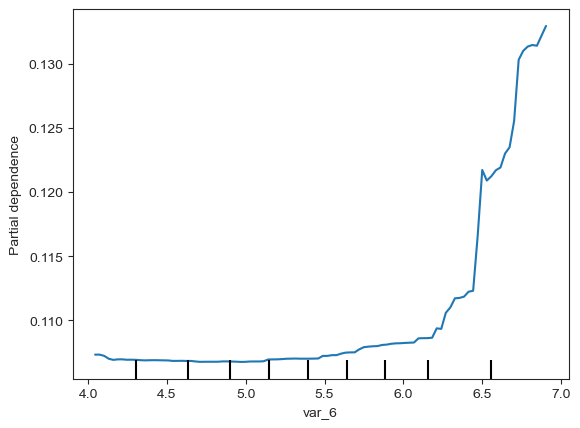

In [33]:
features=[ v for v in x_test.columns if v not in ['ID_code','target']]
feature_to_plot = 'var_6'  # The feature you want to plot
PartialDependenceDisplay.from_estimator(rf_model, x_test, [feature_to_plot])
plt.show()

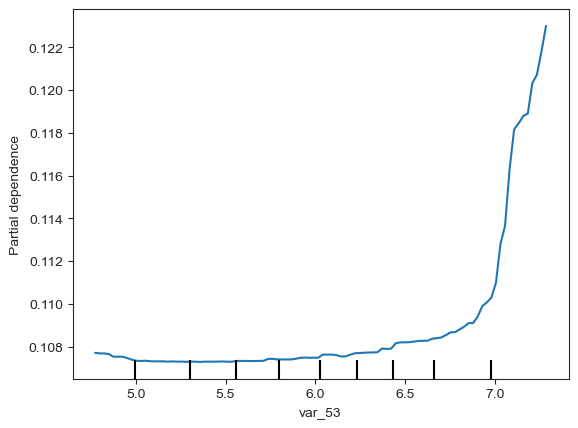

In [34]:
feature_to_plot = 'var_53'  # The feature you want to plot
PartialDependenceDisplay.from_estimator(rf_model, x_test, [feature_to_plot])
plt.show()

In [36]:
x=df_train.drop(['ID_code','target'],axis=1)
y=df_train['target']

skf=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,valid_index in skf.split(x,y):
    x_train,x_valid=x.iloc[train_index],x.iloc[valid_index]
    y_train,y_valid=y.iloc[train_index],y.iloc[valid_index]
    
print("Shape of x_train:",x_train.shape)
print("Shape of x_valid:",x_valid.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_valid:",y_valid.shape)

Shape of x_train: (160000, 200)
Shape of x_valid: (40000, 200)
Shape of y_train: (160000,)
Shape of y_valid: (40000,)


In [37]:
%%time

lr_model=LogisticRegression(random_state=42)
lr_model.fit(x_train,y_train)

CPU times: total: 4.03 s
Wall time: 2.6 s


LogisticRegression(random_state=42)

In [39]:
lr_score=lr_model.score(x_train,y_train)
print("Accuracy of lr model:",lr_score)

Accuracy of lr model: 0.9122


In [41]:
%%time

cv_predict=cross_val_predict(lr_model,x_valid,y_valid,cv=5)
cv_score=cross_val_score(lr_model,x_valid,y_valid,cv=5)
print("Cross Val Score:",np.average(cv_score))

Cross Val Score: 0.9103000000000001
CPU times: total: 9 s
Wall time: 5.08 s


In [42]:
unique,counts=np.unique(cv_predict,return_counts=True)
dict(zip(unique,counts))

{0: 38566, 1: 1434}

In [43]:
cv_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0       0    1
target            
0       35479  501
1        3087  933

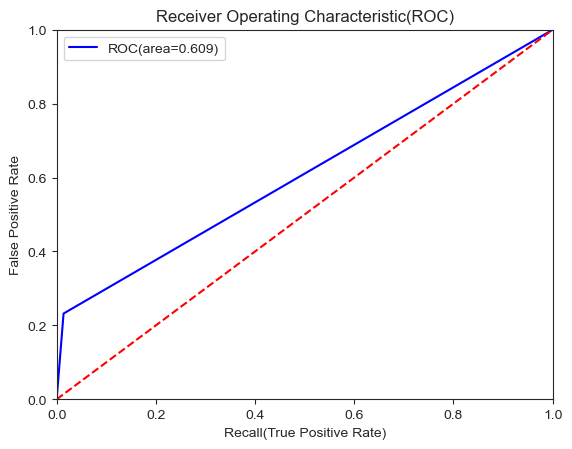

AUC: 0.6090825748965014


In [66]:
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title("Receiver Operating Characteristic(ROC)")
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [48]:
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.65      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



In [49]:
%%time

x_test=df_test.drop(['ID_code'],axis=1)
lr_pred=lr_model.predict(x_test)
print(lr_pred)

[0 0 0 ... 0 0 0]
CPU times: total: 78.1 ms
Wall time: 185 ms


In [57]:
%%time
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42,sampling_strategy=1.0)
x_smote,y_smote=sm.fit_resample(x_train,y_train)
x_smote_v,y_smote_v=sm.fit_resample(x_valid,y_valid)

CPU times: total: 8.12 s
Wall time: 2.93 s


In [58]:
%%time

smote=LogisticRegression(random_state=42)
smote.fit(x_smote,y_smote)

CPU times: total: 8.45 s
Wall time: 4.74 s


LogisticRegression(random_state=42)

In [59]:
smote_score=smote.score(x_smote,y_smote)
print('Accuracy of the smote_model:',smote_score)

Accuracy of the smote_model: 0.7887501563346813


In [60]:
%%time
cv_pred=cross_val_predict(smote,x_smote_v,y_smote_v,cv=5)
cv_score=cross_val_score(smote,x_smote_v,y_smote_v,cv=5)
print('Cross Validation score:',np.average(cv_score))

Cross Validation score: 0.7964007782101167
CPU times: total: 18.1 s
Wall time: 11.3 s


In [62]:
%%time

cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)

CPU times: total: 15.6 ms
Wall time: 28 ms


In [63]:
cm

col_0       0      1
target              
0       28200   7780
1        6871  29109

In [64]:
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score',roc_score)

ROC score 0.7964007782101168


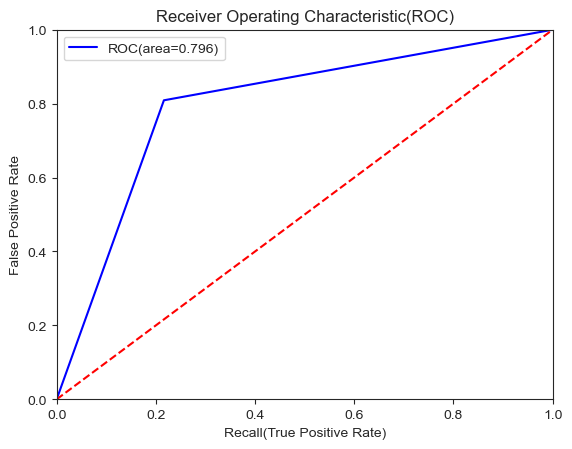

AUC: 0.7964007782101168


In [67]:
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title("Receiver Operating Characteristic(ROC)")
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [68]:
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



In [69]:
%%time

x_test=df_test.drop(['ID_code'],axis=1)
smote_pred=smote.predict(x_test)
print(smote_pred)

[1 1 0 ... 0 0 1]
CPU times: total: 188 ms
Wall time: 246 ms


In [70]:
lgb_train=lgb.Dataset(x_train,label=y_train)
lgb_valid=lgb.Dataset(x_valid,label=y_valid)

In [93]:
params={
    'boosting_type':'gbdt',
    'max_depth':-1,
    'objective':'binary',
    'boost_from_average':False,
    'nthread':20,
    'metric':'auc',
    'num_leaves':50,
    'learning_rate':0.01,
    'max_bin':100,
    'sub_sample_for_bin':100,
    'sub_sample':1,
    'subsample_freq':1,
    'colsample_bytree':0.8,
    'bagging_fraction':0.5,
    'bagging_freq':5,
    'feature_fraction':0.08,
    'min_split_gain':0.45,
    'min_child_weight':1,
    'min_child_samples':5,
    'is_unbalance':True,
    'verbose': -1
}

In [96]:
num_rounds = 10000
lgbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=num_rounds,
    valid_sets=[lgb_train, lgb_valid],
    callbacks=[
        lgb.early_stopping(stopping_rounds=5000),
        lgb.log_evaluation(period=1000)
    ]  
)

lgbm

Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.936948	valid_1's auc: 0.878954
[2000]	training's auc: 0.961726	valid_1's auc: 0.890088
[3000]	training's auc: 0.976364	valid_1's auc: 0.894258
[4000]	training's auc: 0.985743	valid_1's auc: 0.895743
[5000]	training's auc: 0.99151	valid_1's auc: 0.896459
[6000]	training's auc: 0.995136	valid_1's auc: 0.896668
[7000]	training's auc: 0.99732	valid_1's auc: 0.896746
[8000]	training's auc: 0.998599	valid_1's auc: 0.896915
[9000]	training's auc: 0.999323	valid_1's auc: 0.896541
[10000]	training's auc: 0.999695	valid_1's auc: 0.896263
Did not meet early stopping. Best iteration is:
[7812]	training's auc: 0.998413	valid_1's auc: 0.897062


In [98]:
x_test=df_test.drop(['ID_code'],axis=1)
lgbm_predict_prob=lgbm.predict(x_test,random_state=42,num_iteration=lgbm.best_iteration)
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.2686271  0.32203262 0.40031614 ... 0.00991187 0.23931957 0.25256513]
[0 0 0 ... 0 0 0]


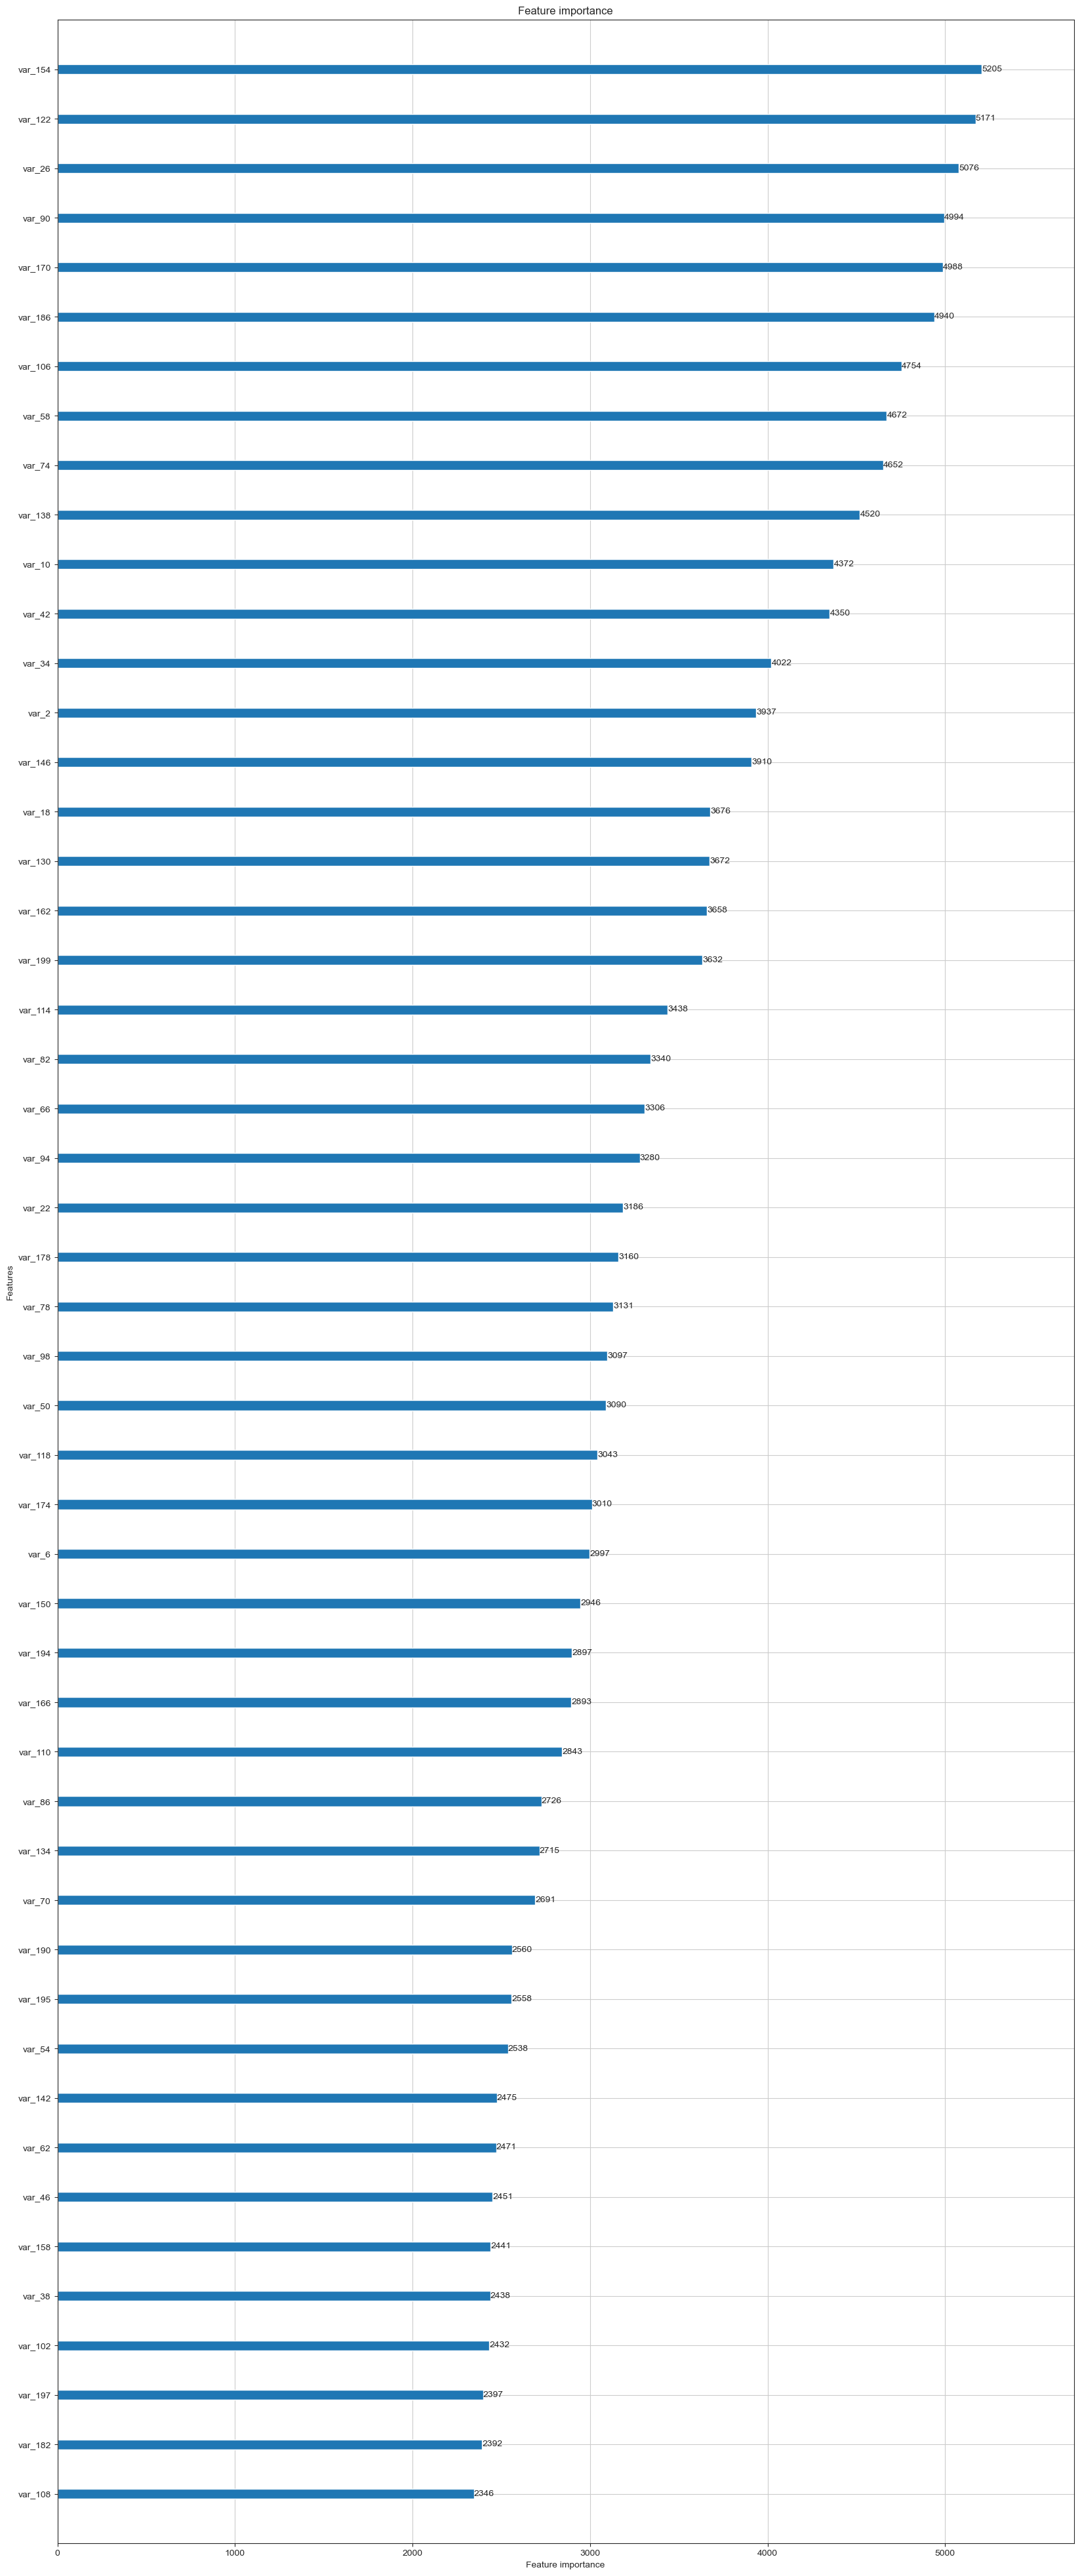

In [100]:
lgb.plot_importance(lgbm,max_num_features=50,importance_type='split',figsize=(20,50))
plt.show()

In [101]:
df_sub=pd.DataFrame({'ID_code':df_test['ID_code'].values})
df_sub['lgbm_predict_prob']=lgbm_predict_prob
df_sub['lgbm_predict']=lgbm_predict
df_sub.to_csv('submission.csv',index=False)
df_sub.head()

ID_code  lgbm_predict_prob  lgbm_predict
0  test_0           0.268627             0
1  test_1           0.322033             0
2  test_2           0.400316             0
3  test_3           0.522544             1
4  test_4           0.187304             0